## Imports ##

کتابخانه های مورد نیاز در این پروژه همه در این قسمت اضافه و ایمپورت شده

In [90]:
import matplotlib.pyplot as plt
from persiantools.jdatetime import JalaliDateTime
from collections import Counter
import seaborn as sns
import pandas as pd
import re

 ### تبدیل فایل اکسل کامنت ها به سی اس وی برای بهتر نمایش دادن داده ها ###

In [93]:
df = pd.read_excel("comment.xlsx")
df.to_csv("comment.csv", index=False)

# بارگذاری داده ها و نمایش مشخصات داده #

دراین قسمت اطلاعات مربوط به داده مان را در هر بخش آن خواهیم داشت

In [96]:
comment_data = pd.read_csv("comment.csv")
comment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100008 entries, 0 to 100007
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   product_id    100008 non-null  int64 
 1   confirmed_at  100008 non-null  object
 2   comment       99903 non-null   object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


# نمایش پنج ردیف اول داده ها #

In [98]:
comment_data.head()

,product_id,confirmed_at,comment
0,90213,2018-08-23 11:05:47,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...
1,56871,2018-08-23 10:21:53,بوی تند ولی خوشبو داره.ماندگاریش خوبه و هر چقد...
2,49738,2018-10-13 11:13:39,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...
3,134367,2018-10-17 11:27:57,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...
4,151402,2018-08-23 10:28:47,این تیغ محصول کشور آمریکا هست ( در عکس محصول م...


# نمایش پنج ردیف آخر داده ها #

با این کار هم میتوانیم ۵ داده از آخر را ببینیم و حتی مطلع شویم که داده های ماچند سطر هستند

In [101]:
comment_data.tail()

,product_id,confirmed_at,comment
100003,104998,2018-07-09 21:27:12,قیمت مناسبی داره در حال حاضر . با این پول سخت ...
100004,333389,2018-07-09 21:26:52,در کل راضیم درسته لنوو با قیمت پایین تر هسته و...
100005,356546,2018-07-09 21:26:30,من این محصول رو از بیرون تهیه کردم . و باید بگ...
100006,33874,2018-07-09 21:26:12,دوسال و.نیم پیش از دیجی کالا گرفتم. هنوز مثل ر...
100007,318278,2018-07-09 21:26:02,با استفاده از این شامپو مشکل خشکی مو و پوست سر...


# پیش پردازش داده ها #

دراین قسمت اعلان ها و کاراکترهای غیر ضروری رو در کامنت ها رو حذف میکنیم

In [104]:
def preprocess_text(text_value):
    if pd.isna(text_value):
        return ''
    text = re.sub(r'[^آ-ی\s]', '', text_value)
    return text

comment_data["comment"] = comment_data["comment"].apply(preprocess_text)


comment_data[["comment"]].head()

,comment
0,سلام قبل اینکه نظرم رو بگم میخواستم به یک موضو...
1,بوی تند ولی خوشبو دارهماندگاریش خوبه و هر چقدر...
2,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...
3,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...
4,این تیغ محصول کشور آمریکا هست در عکس محصول مش...


## persiantools نصب کتابخونه ##

این کتابخونه برای تبدیل تاریخ و زمان میلادی به شمسی می باشد

In [107]:
!pip install persiantools

# تبدیل تاریخ #

دراین قسمت تاریخ میلادی رو به شمسی تبدیل کردیمو در یک ستون جدید قرار دادیم همچنین نام ستون تاریخ میلادی رو هم تغییر دادیم

In [111]:
from persiantools.jdatetime import JalaliDateTime
comment_data['confirmed_at'] = pd.to_datetime(comment_data['confirmed_at'])

comment_data["shamsi_date"] = comment_data["confirmed_at"].apply(lambda x: JalaliDateTime(x).strftime("%Y-%m-%d %H:%M:%S"))
comment_data.rename(columns={"confirmed_at": "miladi_date"}, inplace=True)
comment_data

,product_id,miladi_date,comment,shamsi_date
0,90213,2018-08-23 11:05:47,سلام قبل اینکه نظرم رو بگم میخواستم به یک موضو...,1397-06-01 11:05:47
1,56871,2018-08-23 10:21:53,بوی تند ولی خوشبو دارهماندگاریش خوبه و هر چقدر...,1397-06-01 10:21:53
2,49738,2018-10-13 11:13:39,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...,1397-07-21 11:13:39
3,134367,2018-10-17 11:27:57,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...,1397-07-25 11:27:57
4,151402,2018-08-23 10:28:47,این تیغ محصول کشور آمریکا هست در عکس محصول مش...,1397-06-01 10:28:47
...,...,...,...,...
100003,104998,2018-07-09 21:27:12,قیمت مناسبی داره در حال حاضر با این پول سخت م...,1397-04-18 21:27:12
100004,333389,2018-07-09 21:26:52,در کل راضیم درسته لنوو با قیمت پایین تر هسته و...,1397-04-18 21:26:52
100005,356546,2018-07-09 21:26:30,من این محصول رو از بیرون تهیه کردم و باید بگم...,1397-04-18 21:26:30
100006,33874,2018-07-09 21:26:12,دوسال ونیم پیش از دیجی کالا گرفتم هنوز مثل روز...,1397-04-18 21:26:12


## تعداد کامنت ها در ماه های موجود ##

در ابتدا یک ستون از ماه ها به دیتای خودمون اضافه کردم و در فایل دیتاهای خود از ماه ۳ تا ۱۰ رو داشتیم که تعداد کامنت ها در هر ماه رو روی نمودار رسم کردم تا از تعداد آن ها در هر ماه با خبر شیم
همچنین تعداد دقیق هر کامنت در هر ماه هم نوشته شده است

تعداد کامنت ها در ماه 3 = 4370
تعداد کامنت ها در ماه 4 = 33350
تعداد کامنت ها در ماه 5 = 26579
تعداد کامنت ها در ماه 6 = 26906
تعداد کامنت ها در ماه 7 = 7380
تعداد کامنت ها در ماه 8 = 319
تعداد کامنت ها در ماه 9 = 856
تعداد کامنت ها در ماه 10 = 248


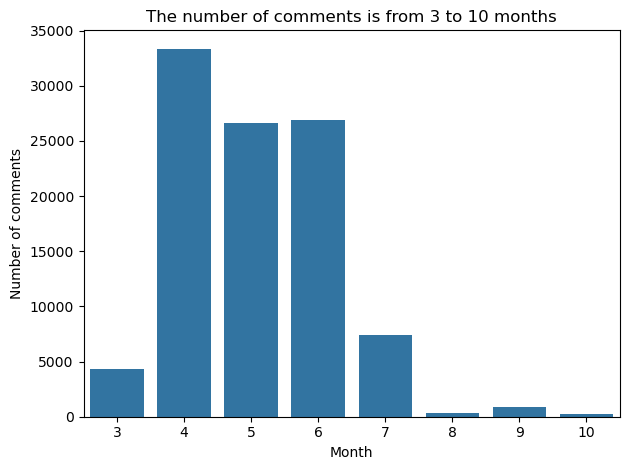

In [115]:
comment_data['miladi_date'] = pd.to_datetime(comment_data['miladi_date'])

comment_data['month'] = comment_data['miladi_date'].dt.month


monthly_counts = comment_data['month'].value_counts().sort_index()
i = 3
for x in monthly_counts:
    print(f"تعداد کامنت ها در ماه {i} = {x}")
    i+=1


sns.countplot(x='month', data=comment_data)
plt.title("The number of comments is from 3 to 10 months")
plt.xlabel("Month")
plt.ylabel("Number of comments")


plt.tight_layout()
plt.show()


# پنج آیدی محصول که کامنت های بیشتری دارند #

اکنون پنج تا از آیدی محصولی که تعداد بیشترین کامنت هارو داشته پیدا کردم و روی نمودار نمایش دادم تا در ادامه ی کار بتونیم از اون ها استفاده دیگری هم در نتیجه گیری هامون داشته باشیم

تعداد کامنت های محصول با آیدی 531870 => 579
تعداد کامنت های محصول با آیدی 356804 => 532
تعداد کامنت های محصول با آیدی 467630 => 374
تعداد کامنت های محصول با آیدی 180451 => 297
تعداد کامنت های محصول با آیدی 327934 => 228


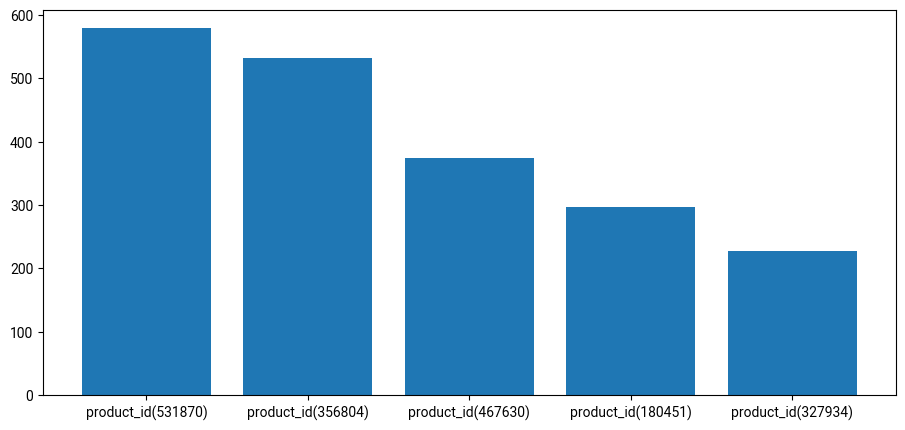

In [262]:
product_count = Counter(comment_data["product_id"])

top_5_products = product_count.most_common(5)

products_id, counts = zip(*top_5_products)

number = 0
for i in range(5):
    print(f"تعداد کامنت های محصول با آیدی {products_id[number]} => {counts[number]}")
    number+=1


pro_list = []
for pro in products_id:
    pro_list.append(f"product_id({pro})")


plt.figure(figsize=(11,5))
plt.bar(pro_list, counts)
plt.show()

In [119]:
comment_data

,product_id,miladi_date,comment,shamsi_date,month
0,90213,2018-08-23 11:05:47,سلام قبل اینکه نظرم رو بگم میخواستم به یک موضو...,1397-06-01 11:05:47,8
1,56871,2018-08-23 10:21:53,بوی تند ولی خوشبو دارهماندگاریش خوبه و هر چقدر...,1397-06-01 10:21:53,8
2,49738,2018-10-13 11:13:39,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...,1397-07-21 11:13:39,10
3,134367,2018-10-17 11:27:57,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...,1397-07-25 11:27:57,10
4,151402,2018-08-23 10:28:47,این تیغ محصول کشور آمریکا هست در عکس محصول مش...,1397-06-01 10:28:47,8
...,...,...,...,...,...
100003,104998,2018-07-09 21:27:12,قیمت مناسبی داره در حال حاضر با این پول سخت م...,1397-04-18 21:27:12,7
100004,333389,2018-07-09 21:26:52,در کل راضیم درسته لنوو با قیمت پایین تر هسته و...,1397-04-18 21:26:52,7
100005,356546,2018-07-09 21:26:30,من این محصول رو از بیرون تهیه کردم و باید بگم...,1397-04-18 21:26:30,7
100006,33874,2018-07-09 21:26:12,دوسال ونیم پیش از دیجی کالا گرفتم هنوز مثل روز...,1397-04-18 21:26:12,7


# شروع تحلیل روی دیتای محصولات #

ابتدا فایل اکسل محصولات رو به سی اس وی تبدیل کردیم 

In [131]:
product_data = pd.read_excel("product.xlsx")
product_data.to_csv("product.csv", index=False)

## باز خوانی فایل محصولات و دریافت مشخصات آن ##

In [134]:
product_data = pd.read_csv("product.csv")
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   product_title_fa    100000 non-null  object
 2   product_title_en    21165 non-null   object
 3   url_code            99983 non-null   object
 4   title_alt           77432 non-null   object
 5   category_title_fa   100000 non-null  object
 6   category_keywords   99740 non-null   object
 7   brand_name_fa       100000 non-null  object
 8   brand_name_en       100000 non-null  object
 9   product_attributes  3050 non-null    object
dtypes: int64(1), object(9)
memory usage: 7.6+ MB


/var/folders/9y/k_l50h914nlb85lnwqgg91y40000gn/T/ipykernel_24647/1211174458.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  product_data = pd.read_csv("product.csv")


## دریافت پنج ردیف اول محصولات ##

In [136]:
product_data.head()

,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes
0,723302,ماگ حرارتی لومانا مدل عرفانه کد MAG1042,NaN,ماگ-حرارتی-لومانا-مدل-عرفانه-کد-mag1042,mug، لیوان ، ماگ ، فنجان ، لیوان دسته دار ، لو...,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,لومانا,Lomana,"[{""Key"":""وزن بسته‌بندی"",""Value"":""480""},{""Key"":..."
1,727089,ست آبکش و آبگیر تیتیز مدل AP-9141 سایز متوسط,NaN,ست-آبکش-و-آبگیر-تیتیز-مدل-ap-9141-سایز-متوسط,";hsi, steel, کاسه، کاسه بامبو، لگن، کالا خانه ...",آبکش و آبگیر,آبکش و آبگیر VirgoBasin,تیتیز,Titiz,"[{""Key"":""دستگیره"",""Value"":""1 جفت""},{""Key"":""نوع..."
2,727096,روغن مرطوب کننده کدلی مدل Divine oil حجم 50 می...,NaN,روغن-مرطوب-کننده-کدلی-مدل-divine-oil-حجم-50-می...,NaN,روغن صورت,روغن صورت Face-Oil,کدلی,CAUDALIE,"[{""Key"":""حجم"",""Value"":""50""},{""Key"":""نوع عصاره""..."
3,727803,ست لحاف پوپلین هوبی مدل اما یکنفره چهار تکه کاوری,Hobby Emma Quilt Single Set - 4 Pieces,ست-لحاف-پوپلین-هوبی-مدل-اما-یکنفره-چهار-تکه-کاوری,روتختی اسپرت، اما، emma، روتختی یکنفره، لحاف ی...,سرویس خواب,سرویس خواب SleepSet,هوبی,Hobby,"[{""Key"":""ابعاد رو بالشی"",""Value"":""50×70""},{""Ke..."
4,725222,ماگ آبنبات رنگی مدل AR0143,NaN,ماگ-آبنبات-رنگی-مدل-ar0143,ماگ آبنبات رنگی،شذدشذشفقشدله،Mag Abnabatrangi,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,متفرقه,Miscellaneous,"[{""Key"":""در"",""Value"":""ندارد""},{""Key"":""جنس"",""Va..."


## دریافت پنج ردیف آخر دیتای محصولات ##

In [144]:
product_data.tail()

,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes
99995,803375,سوتین زنانه طرح گل کد 262014527,NaN,سوتین-زنانه-طرح-گل-کد-262014527,لباس زیر، کتان، سوتین، شورت و سوتین، توری، جک ...,سوتین,سوتین Women-UW-Bra,متفرقه,Miscellaneous,NaN
99996,790932,محافظ صفحه نمایش مدل نانو گلس مناسب برای گوشی ...,NaN,محافظ-صفحه-نمایش-مدل-نانو-گلس-مناسب-برای-گوشی-...,نانو گلس سامسونگ J7 Pro ، محافظ صفحه نمایش ،ن...,محافظ صفحه نمایش گوشی,محافظ صفحه نمایش گوشی Cell-Phone-Screen-Guard,متفرقه,Miscellaneous,NaN
99997,786604,تابلو نوشته تکس پیک مدل A63,NaN,تابلو-نوشته-تکس-پیک-مدل-a63,"عکس نوشته,تابلونوشته,تکستگرافی,تابلوعکس,تابلو ...",تابلو شاسی,تابلو شاسی Chassis,متفرقه,Miscellaneous,NaN
99998,799047,سینی برایتون مدل BT-8387,NaN,سینی-برایتون-مدل-bt-8387,سینی، سینی چای، sdkd ]hd,سینی,سینی Tray,برایتون,briton,NaN
99999,782276,تیشرت زنانه تارپون طرح فانتزی کد 10532,NaN,تیشرت-زنانه-تارپون-طرح-فانتزی-کد-10532,تیشرت، تیشرت آستین کوتاه، تیشرت تارپون، تیشرت ...,تی‌شرت و پولوشرت زنانه,تی‌شرت و پولوشرت زنانه womens-tshirts-polos,تارپون,tarpon,NaN


تعداد خرید از دسته بندی کیف و کاور گوشی  ==> 4384
تعداد خرید از دسته بندی تیشرت و پولوشرت مردانه  ==> 4038
تعداد خرید از دسته بندی محافظ صفحه نمایش گوشی  ==> 1962
تعداد خرید از دسته بندی ساعت مچی عقربهای   ==> 1932
تعداد خرید از دسته بندی کتاب چاپی  ==> 1912


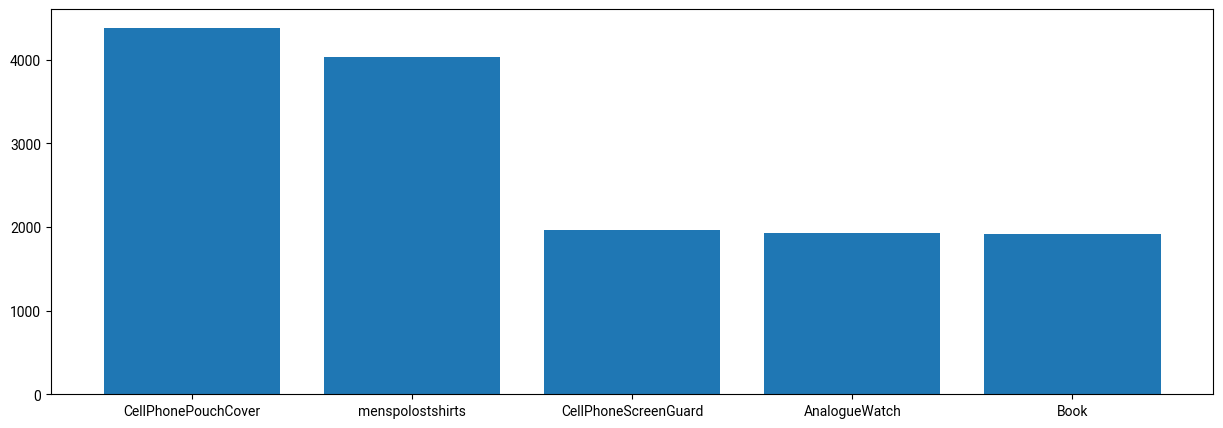

In [256]:
id_count = Counter(product_data["category_keywords"])
top_5_id = id_count.most_common(5)

top_list = []
top_list_en = []
for x in top_5_id:
    y = re.sub(r'[^آ-ی\s]', '', x[0])
    z = re.sub(r'[^a-zA-Z\s]', '', x[0])
    top_list.append((y, x[1])) 
    top_list_en.append((z, x[1])) 
    
category, count = zip(*top_list)

categories = [re.sub(r"A-Za-z","",item[0].strip()) for item in top_list_en]

i = 0
for c in category:
    print(f"تعداد خرید از دسته بندی {c} ==> {count[i]}")
    i+=1
    
plt.figure(figsize=(15,5))
plt.bar(categories, count)

plt.show()
